In [1]:
import pandas as pd
import numpy as np

In [2]:
f = pd.read_csv('C:/Users/vinay/Desktop/Fake News Detection System/dataset/Fake.csv', delimiter = ',')
t = pd.read_csv('C:/Users/vinay/Desktop/Fake News Detection System/dataset/True.csv', delimiter = ',')

In [3]:
f.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
t.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [5]:
f['temp']= 0
t['temp']= 1

datas = pd.DataFrame()
datas = t.append(f)

In [6]:
datas.head()

,title,text,subject,date,temp
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [7]:
print(datas.shape)

(44898, 5)


In [8]:
column = ['date','subject']
datas = datas.drop(columns=column)

In [9]:
print(datas.shape)

(44898, 3)


In [10]:
datas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 23480
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   44898 non-null  object
 1   text    44898 non-null  object
 2   temp    44898 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


In [11]:
input_arr=np.array(datas['title'])

In [12]:
import re
import nltk

In [13]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

corpus = []

for i in range(0, 40000):
    newArr = re.sub('[^a-zA-Z]', ' ', input_arr[i])

    newArr = newArr.lower()

    newArr = newArr.split()

    ps = PorterStemmer()
    newArr = [ps.stem(word) for word in newArr if not word in set(stopwords.words('english'))]

    newArr = ' '.join(newArr)

    corpus.append(newArr)

In [14]:
corpus

['u budget fight loom republican flip fiscal script',
 'u militari accept transgend recruit monday pentagon',
 'senior u republican senat let mr mueller job',
 'fbi russia probe help australian diplomat tip nyt',
 'trump want postal servic charg much amazon shipment',
 'white hous congress prepar talk spend immigr',
 'trump say russia probe fair timelin unclear nyt',
 'factbox trump twitter dec approv rate amazon',
 'trump twitter dec global warm',
 'alabama offici certifi senat elect jone today despit challeng cnn',
 'jone certifi u senat winner despit moor challeng',
 'new york governor question constitution feder tax overhaul',
 'factbox trump twitter dec vaniti fair hillari clinton',
 'trump twitter dec trump iraq syria',
 'man say deliv manur mnuchin protest new u tax law',
 'virginia offici postpon lotteri draw decid tie statehous elect',
 'u lawmak question businessman trump tower meet sourc',
 'trump twitter dec hillari clinton tax cut bill',
 'u appeal court reject challeng tr

In [18]:
datas

,title,text,temp
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,1
...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,0


In [19]:
from sklearn.feature_extraction.text import CountVectorizer
countv = CountVectorizer(max_features = 5000)

X = countv.fit_transform(corpus).toarray()
y = datas.iloc[0:40000, 2].values

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [21]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [22]:
y_pred = classifier.predict(X_test)

In [24]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [25]:
print(cm)

[[3488  264]
 [ 140 4108]]


In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95      3752
           1       0.94      0.97      0.95      4248

    accuracy                           0.95      8000
   macro avg       0.95      0.95      0.95      8000
weighted avg       0.95      0.95      0.95      8000



In [27]:
from sklearn.metrics import accuracy_score
print("Accuarcy: {}".format(round(accuracy_score(y_test, y_pred)*100,2)))

Accuarcy: 94.95


In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

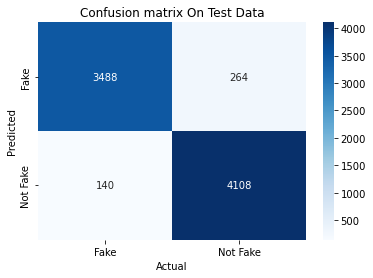

In [67]:
new_cm = pd.DataFrame(cm , index = ['Fake','Not Fake'] , columns = ['Fake','Not Fake'])
sns.heatmap(new_cm,cmap= 'Blues', annot = True, fmt='',xticklabels = ['Fake','Not Fake'], yticklabels = ['Fake','Not Fake'])
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title('Confusion matrix On Test Data')
plt.show()

In [27]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [28]:
y_pred = gnb.predict(X_test)

In [29]:
print("Gaussian Naive Bayes model accuracy(in %):", accuracy_score(y_test, y_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 88.3


In [30]:
cm = confusion_matrix(y_test, y_pred)

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.83      0.87      3752
           1       0.86      0.93      0.89      4248

    accuracy                           0.88      8000
   macro avg       0.89      0.88      0.88      8000
weighted avg       0.89      0.88      0.88      8000



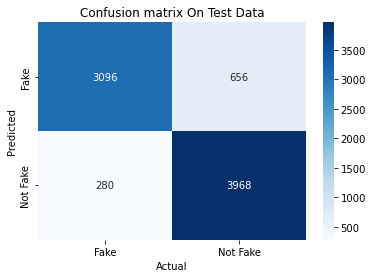

In [32]:
new_cm = pd.DataFrame(cm , index = ['Fake','Not Fake'] , columns = ['Fake','Not Fake'])
sns.heatmap(new_cm,cmap= 'Blues', annot = True, fmt='',xticklabels = ['Fake','Not Fake'], yticklabels = ['Fake','Not Fake'])
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title('Confusion matrix On Test Data')
plt.show()

In [33]:
from sklearn.linear_model import PassiveAggressiveClassifier
classifier = PassiveAggressiveClassifier(max_iter=1000)
classifier.fit(X_train, y_train)

PassiveAggressiveClassifier()

In [40]:
y_pred = classifier.predict(X_test)

In [34]:
print("Passive Agressive Classifier accuracy(in %):", accuracy_score(y_test, y_pred)*100)

Passive Agressive Classifier accuracy(in %): 88.3


In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.83      0.87      3752
           1       0.86      0.93      0.89      4248

    accuracy                           0.88      8000
   macro avg       0.89      0.88      0.88      8000
weighted avg       0.89      0.88      0.88      8000

